<a href="https://colab.research.google.com/github/mariamelsaka/VideoSCV11/blob/main/sign%20lan%20v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
import cv2
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
import os
import glob as gb
import cv2
import tensorflow as tf
import keras

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip /content/drive/MyDrive/ArASL_Database_54K.zip

Streaming output truncated to the last 5000 lines.
 extracting: ArASL_Database_54K/train/toot/TOOT (877).jpg  
 extracting: ArASL_Database_54K/train/toot/TOOT (878).jpg  
 extracting: ArASL_Database_54K/train/toot/TOOT (879).jpg  
 extracting: ArASL_Database_54K/train/toot/TOOT (880).jpg  
 extracting: ArASL_Database_54K/train/toot/TOOT (881).jpg  
 extracting: ArASL_Database_54K/train/toot/TOOT (882).jpg  
 extracting: ArASL_Database_54K/train/toot/TOOT (883).jpg  
 extracting: ArASL_Database_54K/train/toot/TOOT (884).jpg  
 extracting: ArASL_Database_54K/train/toot/TOOT (885).jpg  
 extracting: ArASL_Database_54K/train/toot/TOOT (886).jpg  
 extracting: ArASL_Database_54K/train/toot/TOOT (887).jpg  
 extracting: ArASL_Database_54K/train/toot/TOOT (888).jpg  
 extracting: ArASL_Database_54K/train/toot/TOOT (889).jpg  
 extracting: ArASL_Database_54K/train/toot/TOOT (890).jpg  
 extracting: ArASL_Database_54K/train/toot/TOOT (891).jpg  
 extracting: ArASL_Database_54K/train/toot/TOOT (

In [4]:
datapath='/content/ArASL_Database_54K/'
for folder in  os.listdir(datapath +'train') : 
    files = gb.glob(pathname= str( datapath +'train//' + folder + '/*.jpg'))
    print(f'For train data , found {len(files)} in folder {folder}')

For train data , found 1213 in folder gaaf
For train data , found 915 in folder waw
For train data , found 1250 in folder laam
For train data , found 1225 in folder thaa
For train data , found 1443 in folder fa
For train data , found 1232 in folder ya
For train data , found 1065 in folder jeem
For train data , found 1022 in folder sheen
For train data , found 1165 in folder la
For train data , found 993 in folder yaa
For train data , found 1219 in folder toot
For train data , found 1099 in folder dal
For train data , found 1321 in folder ta
For train data , found 1181 in folder ra
For train data , found 1372 in folder meem
For train data , found 1393 in folder saad
For train data , found 1159 in folder aleff
For train data , found 1141 in folder khaa
For train data , found 1033 in folder al
For train data , found 1235 in folder kaaf
For train data , found 1283 in folder nun
For train data , found 1012 in folder haa
For train data , found 1270 in folder taa
For train data , found 1376 i

In [5]:

for folder in  os.listdir(datapath +'test') : 
    files = gb.glob(pathname= str( datapath +'test//' + folder + '/*.jpg'))
    print(f'For train data , found {len(files)} in folder {folder}')

For train data , found 126 in folder gaaf
For train data , found 92 in folder waw
For train data , found 195 in folder laam
For train data , found 125 in folder thaa
For train data , found 148 in folder fa
For train data , found 75 in folder ya
For train data , found 80 in folder jeem
For train data , found 102 in folder sheen
For train data , found 243 in folder la
For train data , found 190 in folder yaa
For train data , found 218 in folder toot
For train data , found 125 in folder dal
For train data , found 120 in folder ta
For train data , found 76 in folder ra
For train data , found 4 in folder meem
For train data , found 97 in folder saad
For train data , found 86 in folder aleff
For train data , found 73 in folder khaa
For train data , found 157 in folder al
For train data , found 152 in folder kaaf
For train data , found 147 in folder nun
For train data , found 137 in folder haa
For train data , found 152 in folder taa
For train data , found 217 in folder ghain
For train data ,

In [6]:
files = gb.glob(pathname= str(datapath +'pre/*.jpg'))
print(f'For Prediction data , found {len(files)}')

For Prediction data , found 542


In [7]:
# let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random 

def view_random_image(target_dir, target_class):
  # Set the target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)  
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image 

  return img

['Aleff (1208).jpg']
Image shape: (64, 64)


array([[237, 237, 237, ..., 226, 225, 225],
       [237, 237, 236, ..., 225, 225, 225],
       [237, 236, 236, ..., 224, 224, 224],
       ...,
       [233, 233, 232, ...,  36,  39,  45],
       [233, 232, 231, ...,  42,  49,  44],
       [232, 232, 231, ...,  48,  32,  37]], dtype=uint8)

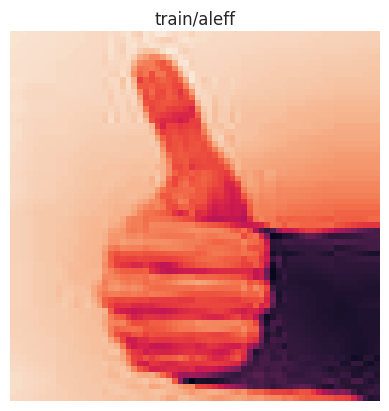

In [8]:
view_random_image(str(datapath),'train/aleff')


In [9]:
#check images
size = []
for folder in  os.listdir(datapath+'train') : 
    files = gb.glob(pathname= str( datapath +'train//' + folder + '/*.jpg'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts() #value count get number of values that are similar

(64, 64)       36942
(256, 256)       198
(1024, 768)       10
(64, 64, 3)        2
dtype: int64

In [10]:
#check images
size = []
for folder in  os.listdir(datapath+'test') : 
    files = gb.glob(pathname= str( datapath +'test//' + folder + '/*.jpg'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts() #value count get number of values that are similar

(64, 64)      4297
(256, 256)      21
dtype: int64

In [11]:
#check images
size = []
files = gb.glob(pathname= str( datapath +'pre/*.jpg'))
for file in files: 
    image = plt.imread(file)
    size.append(image.shape)
pd.Series(size).value_counts() #value count get number of values that are similar

(64, 64)      522
(256, 256)     20
dtype: int64

In [18]:
s=64

In [12]:
code = {'ain':0 ,'al':1,'aleff':2,'bb':3,
'dal':4,
'dha':5,
'dhad':6,
'fa':7,
'gaaf':8,
'ghain':9,
'ha':10,
'haa':11,
'jeem':12,
'kaaf':13,
'khaa':14,
'la':15,
'laam':16,
'meem':17,
'nun':18,
'ra':19,
'saad':20,
'seen':21,
'sheen':22,
'ta':23,
'taa':24,
'thaa':25,
'thal':26,
'toot':27,
'waw':28,
'ya':29,
'yaa':30,
'zay':31,
       }
def getcode(n) : 
    for x , y in code.items() : 
        if n == y : 
            return x

In [19]:
X_train = []
y_train = []
for folder in  os.listdir(datapath+'train' ) : 
    files = gb.glob(pathname= str(datapath +'train//' + folder + '/*.jpg'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        X_train.append(list(image_array))
        y_train.append(code[folder])


In [20]:
print(f'we have {len(X_train)} items in X_train')

we have 37152 items in X_train


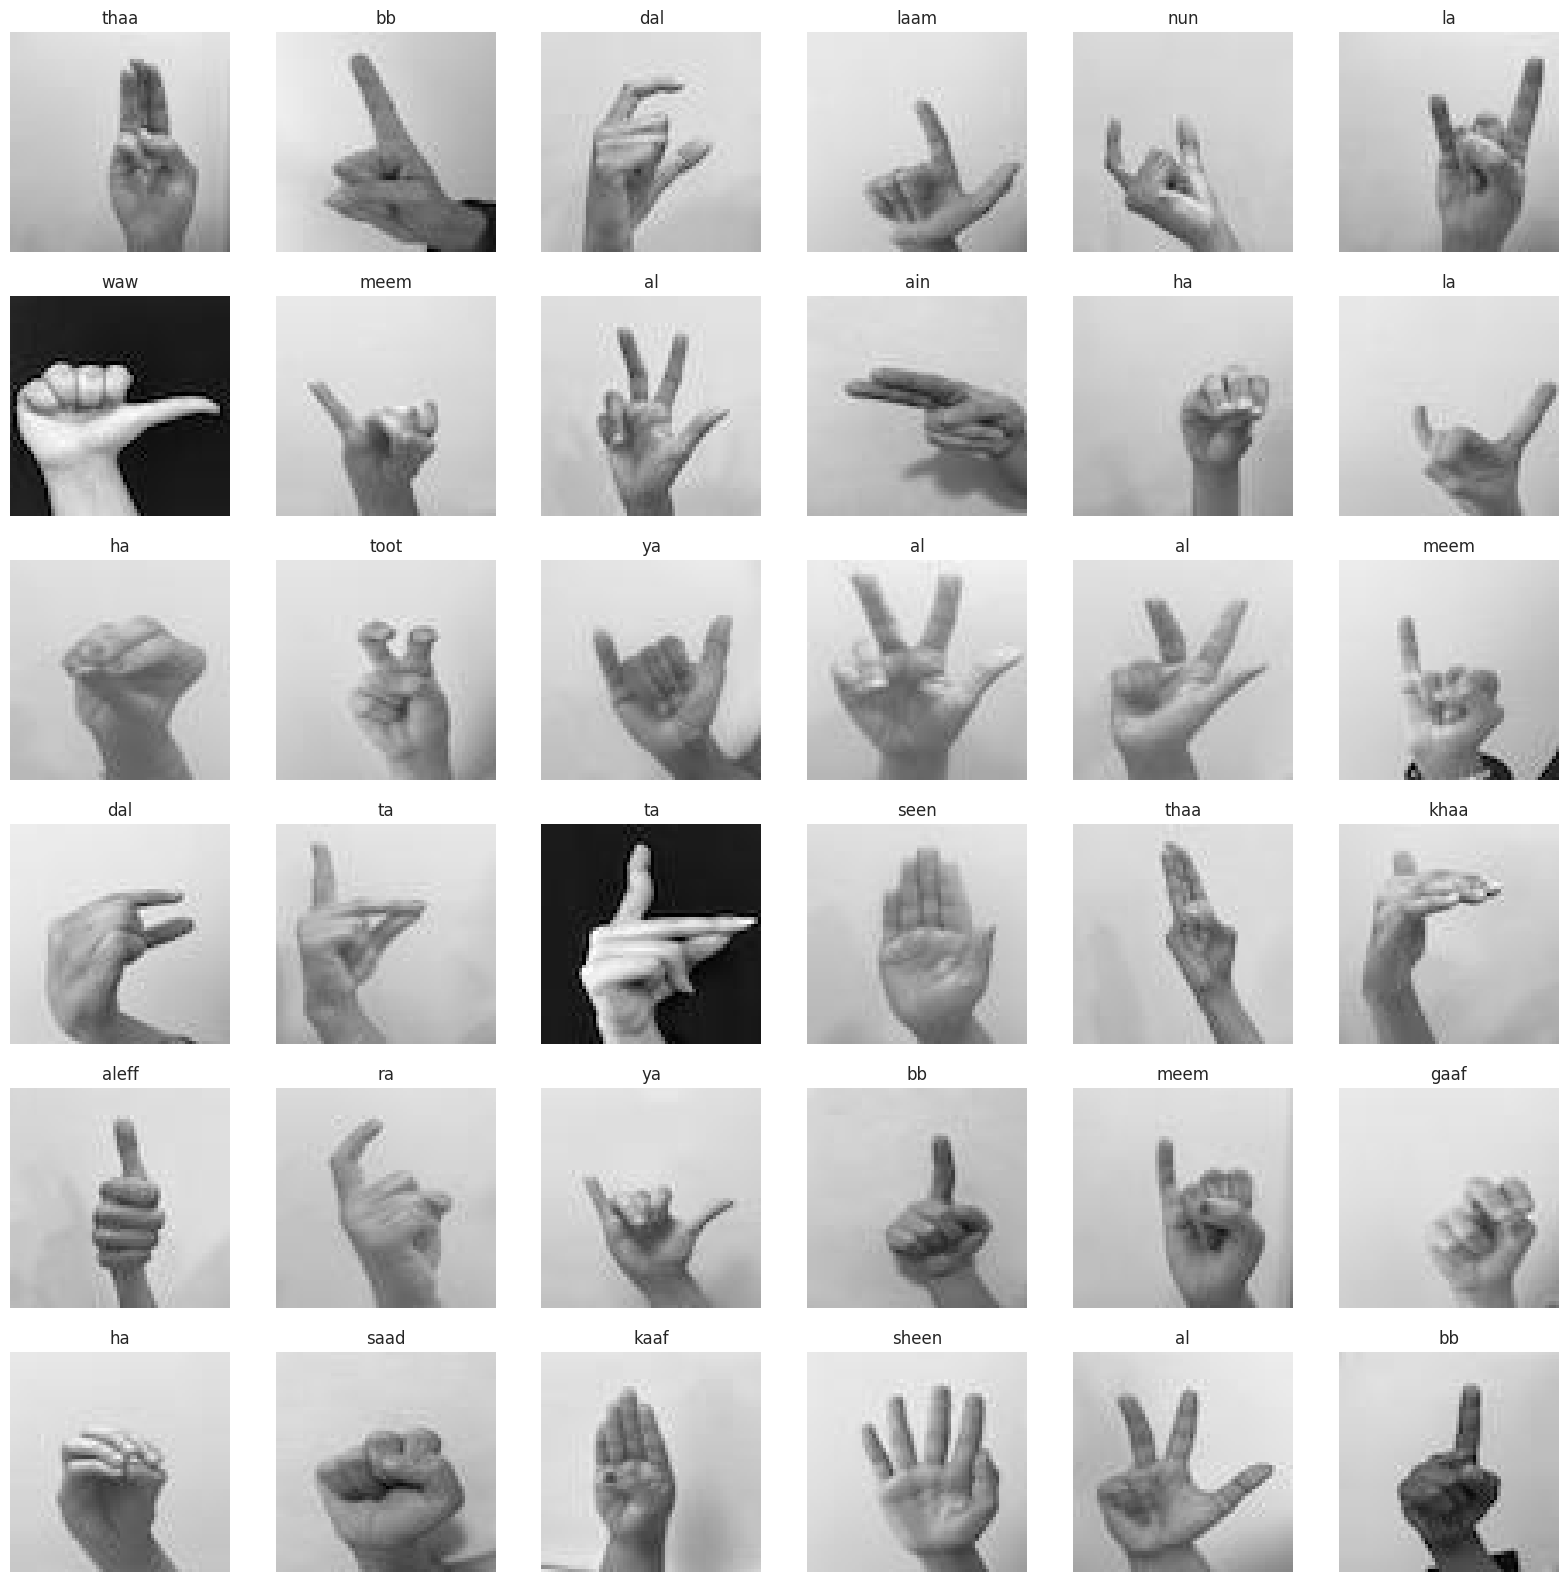

In [22]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_train),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_train[i])   
    plt.axis('off')
    plt.title(getcode(y_train[i]))

In [23]:

X_test = []
y_test = []
for folder in  os.listdir(datapath+'test') : 
    files = gb.glob(pathname= str(datapath + 'test//' + folder + '/*.jpg'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        X_test.append(list(image_array))
        y_test.append(code[folder])

In [24]:
print(f'we have {len(X_test)} items in X_test')


we have 4318 items in X_test


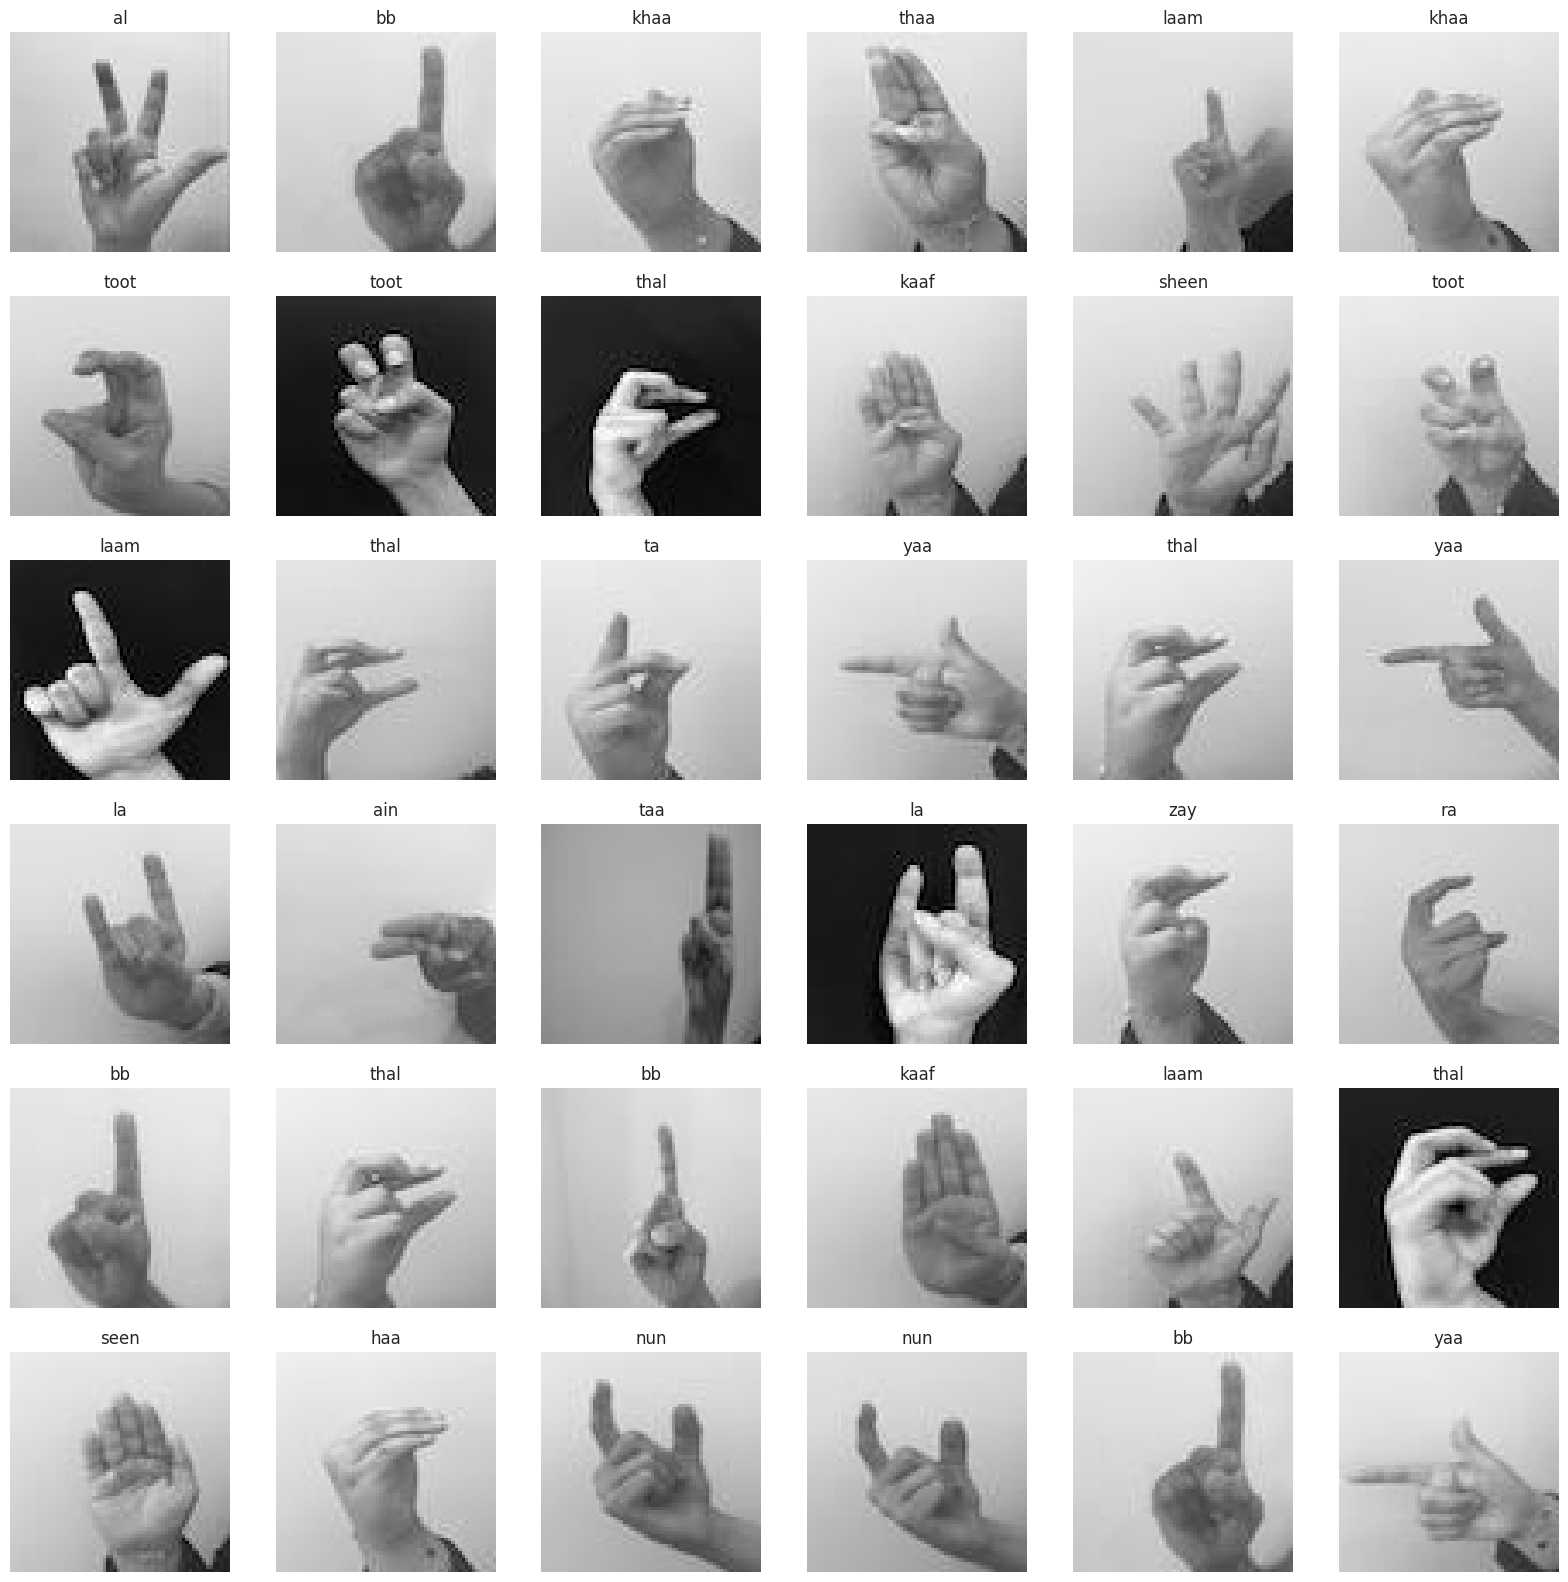

In [25]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_test),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_test[i])    
    plt.axis('off')
    plt.title(getcode(y_test[i]))

In [26]:
X_pred = []
files = gb.glob(pathname= str(datapath + 'pre/*.jpg'))
for file in files: 
    image = cv2.imread(file)
    image_array = cv2.resize(image , (s,s))
    X_pred.append(list(image_array))

In [27]:
print(f'we have {len(X_pred)} items in X_pred')

we have 542 items in X_pred


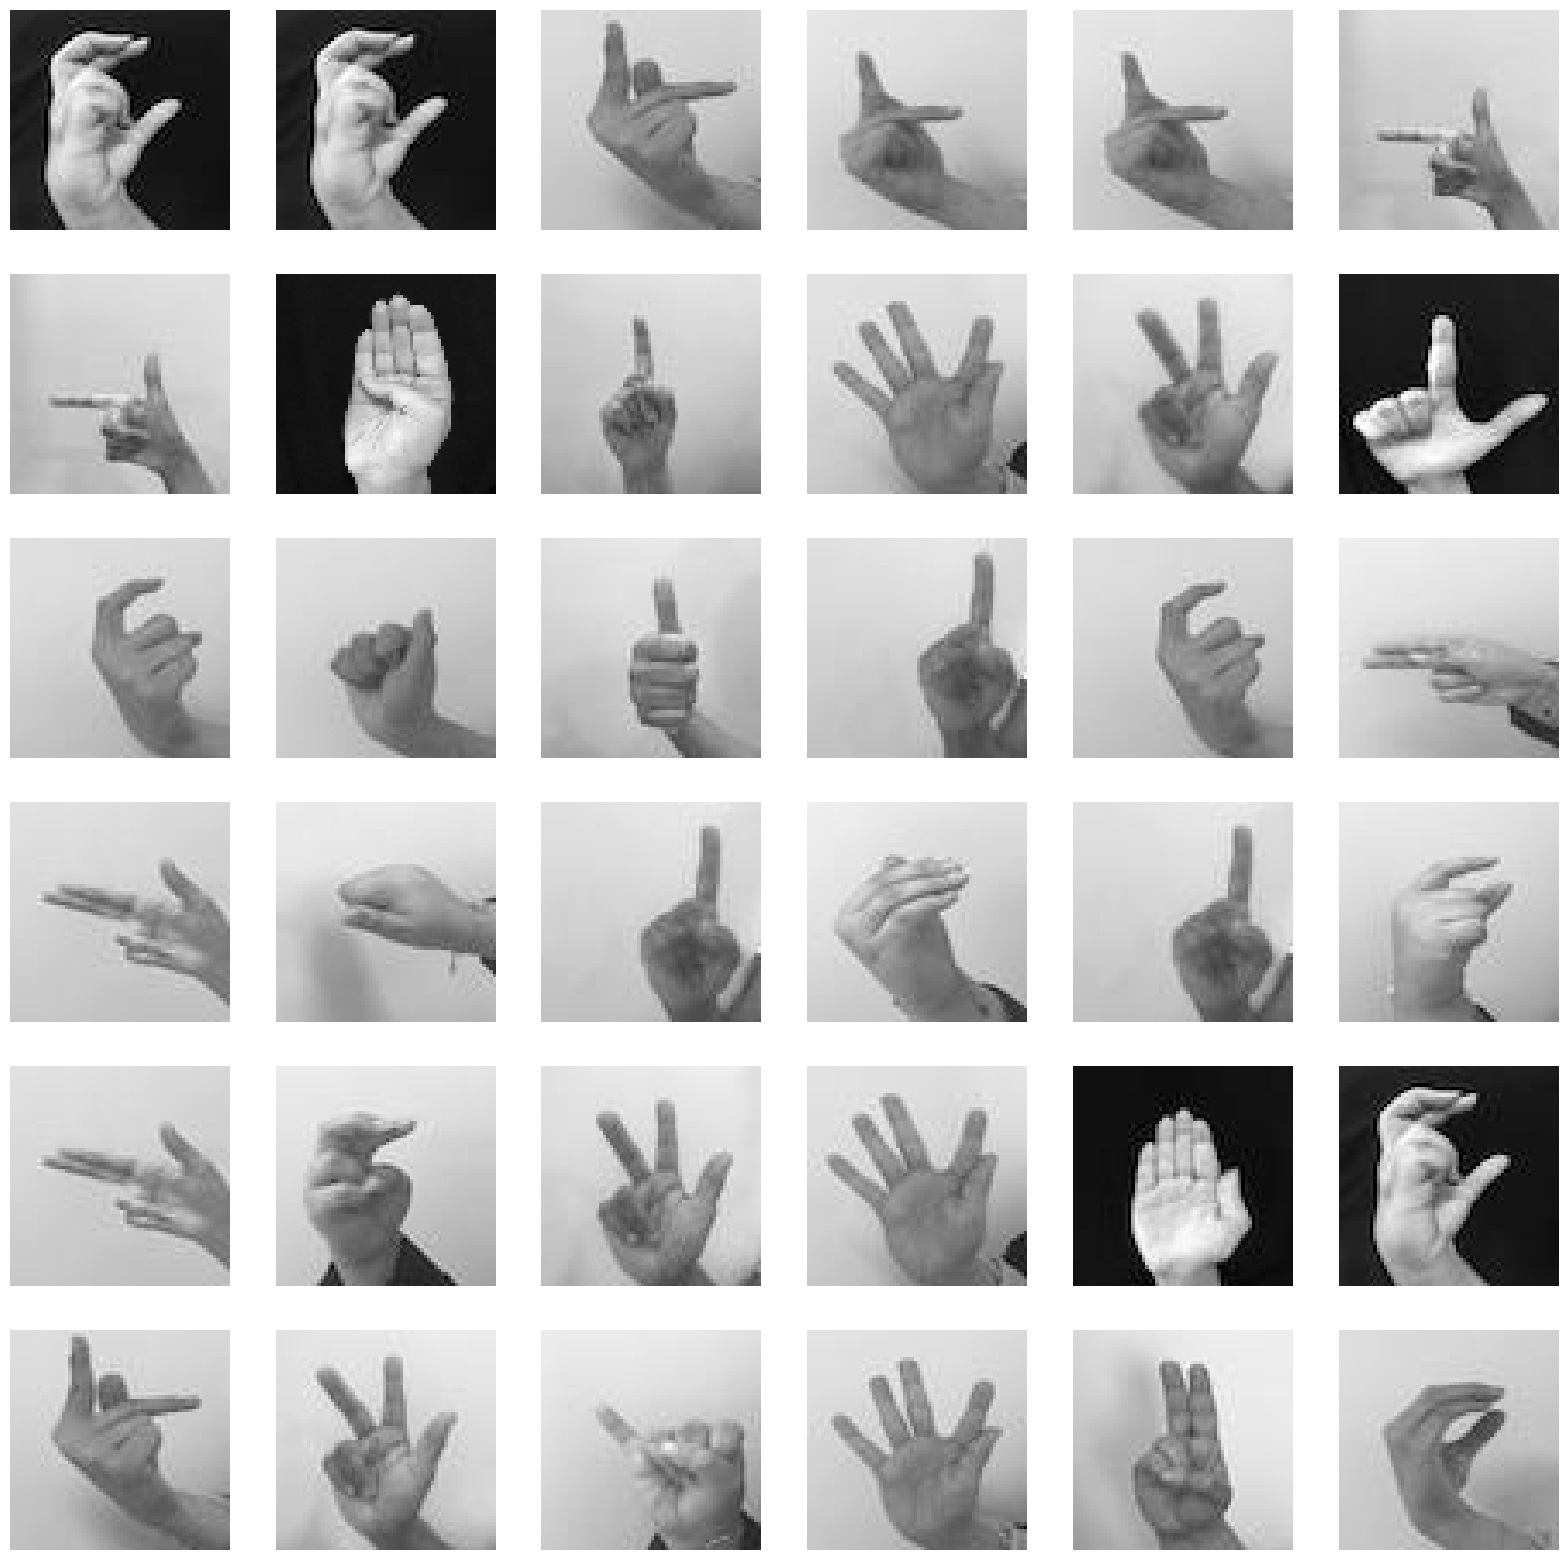

In [28]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_pred),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_pred[i])    
    plt.axis('off')
    

In [29]:
X_train = np.array(X_train)
X_test = np.array(X_test)
X_pred_array = np.array(X_pred)
y_train = np.array(y_train)
y_test = np.array(y_test)

print(f'X_train shape  is {X_train.shape}')
print(f'X_test shape  is {X_test.shape}')
print(f'X_pred shape  is {X_pred_array.shape}')
print(f'y_train shape  is {y_train.shape}')
print(f'y_test shape  is {y_test.shape}')

X_train shape  is (37152, 64, 64, 3)
X_test shape  is (4318, 64, 64, 3)
X_pred shape  is (542, 64, 64, 3)
y_train shape  is (37152,)
y_test shape  is (4318,)


In [30]:
def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)].T
    return Y

In [31]:
# Normalize image vectors
X_train = X_train / 255.
X_test = X_test / 255.

# Convert training and test labels to one hot matrices
Y_train = convert_to_one_hot(y_train, 32).T
Y_test = convert_to_one_hot(y_test, 32).T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 37152
number of test examples = 4318
X_train shape: (37152, 64, 64, 3)
Y_train shape: (37152, 32)
X_test shape: (4318, 64, 64, 3)
Y_test shape: (4318, 32)


In [32]:
from tensorflow import keras
from tensorflow.keras import layers
data_augmentation = keras.Sequential(
  [
    keras.layers.experimental.preprocessing.RandomFlip("horizontal",input_shape=(64, 64,3)),
    keras.layers.experimental.preprocessing.RandomRotation(0.1),
    #  keras.layers.experimental.preprocessing.RandomContrast(0.9),
    keras.layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [33]:
data_augmentation(X_train)[0]

<tf.Tensor: shape=(64, 64, 3), dtype=float32, numpy=
array([[[0.69214803, 0.69214803, 0.69214803],
        [0.636642  , 0.636642  , 0.636642  ],
        [0.62920254, 0.62920254, 0.62920254],
        ...,
        [0.8604053 , 0.8604053 , 0.8604053 ],
        [0.8605171 , 0.8605171 , 0.8605171 ],
        [0.8617756 , 0.8617756 , 0.8617756 ]],

       [[0.68632305, 0.68632305, 0.68632305],
        [0.62101245, 0.62101245, 0.62101245],
        [0.6122503 , 0.6122503 , 0.6122503 ],
        ...,
        [0.858924  , 0.858924  , 0.858924  ],
        [0.8589343 , 0.8589343 , 0.8589343 ],
        [0.8591535 , 0.8591535 , 0.8591535 ]],

       [[0.6856057 , 0.6856057 , 0.6856057 ],
        [0.6192493 , 0.6192493 , 0.6192493 ],
        [0.6103432 , 0.6103432 , 0.6103432 ],
        ...,
        [0.85882354, 0.85882354, 0.85882354],
        [0.85882354, 0.85882354, 0.85882354],
        [0.85893196, 0.85893196, 0.85893196]],

       ...,

       [[0.3803716 , 0.3803716 , 0.3803716 ],
        [0.3707

In [34]:
KerasModel = keras.models.Sequential([
        data_augmentation,
        keras.layers.Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(s,s,3)),
        keras.layers.Conv2D(150,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPool2D(4,4),
        keras.layers.Dropout(rate=0.5) ,  
        keras.layers.Conv2D(120,kernel_size=(3,3),activation='relu'),    
        keras.layers.Conv2D(80,kernel_size=(3,3),activation='relu'),    
        keras.layers.Conv2D(50,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPool2D(4,4),
        keras.layers.Dropout(rate=0.6) ,  
        keras.layers.Flatten() ,    
        keras.layers.Dense(120,activation='relu') ,    
        keras.layers.Dense(100,activation='relu') ,    
        keras.layers.Dense(50,activation='relu') ,        
        # keras.layers.Dropout(rate=0.5) ,            
        keras.layers.Dense(32,activation='softmax') ,    
        ])

In [35]:
KerasModel.compile(optimizer ='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [36]:
print('Model Details are : ')
print(KerasModel.summary())
# fashion_model.summary()


Model Details are : 
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 64, 64, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 62, 62, 200)       5600      
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 150)       270150    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 150)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 150)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 120)       162120    
                                 

In [37]:
# # ThisModel = KerasModel.fit(X_train, y_train, epochs=40,batch_size=64,verbose=1)
ThisModel = KerasModel.fit(X_train, y_train, epochs=80,batch_size=64,verbose=1,validation_data=(X_test,y_test) )

Epoch 1/80
581/581 [==============================] - 73s 98ms/step - loss: 3.4608 - accuracy: 0.0371 - val_loss: 3.4758 - val_accuracy: 0.0343
Epoch 2/80
581/581 [==============================] - 54s 93ms/step - loss: 3.4174 - accuracy: 0.0457 - val_loss: 3.0351 - val_accuracy: 0.0806
Epoch 3/80
581/581 [==============================] - 55s 95ms/step - loss: 2.6995 - accuracy: 0.1734 - val_loss: 2.0616 - val_accuracy: 0.3638
Epoch 4/80
581/581 [==============================] - 55s 94ms/step - loss: 2.1390 - accuracy: 0.3085 - val_loss: 1.5777 - val_accuracy: 0.5067
Epoch 5/80
581/581 [==============================] - 56s 96ms/step - loss: 1.7796 - accuracy: 0.4102 - val_loss: 1.3686 - val_accuracy: 0.5521
Epoch 6/80
581/581 [==============================] - 55s 94ms/step - loss: 1.5775 - accuracy: 0.4765 - val_loss: 1.2481 - val_accuracy: 0.6035
Epoch 7/80
581/581 [==============================] - 55s 94ms/step - loss: 1.4290 - accuracy: 0.5171 - val_loss: 1.1897 - val_accuracy: